In [40]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
import tensorflow as tf

In [41]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data',names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [42]:
df['class'] = (df['class']=='g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [43]:
df['class'].unique()

array([1, 0])

In [44]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

C:\Users\dhurk\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [45]:
def scale_data(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)
    data = np.hstack((X,np.reshape(y,(-1,1))))
    return data,X,y

In [46]:
train, train_X, train_y = scale_data(train,oversample=True)
valid, valid_X, valid_y = scale_data(valid,oversample=False)
test, test_X, test_y = scale_data(test,oversample=False)

In [47]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\dhurk\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
history = nn_model.fit(
    train_X, train_y, epochs=100, batch_size=64, validation_data=(valid_X, valid_y), verbose=1
)


Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7266 - loss: 0.5480 - val_accuracy: 0.8307 - val_loss: 0.3976
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8212 - loss: 0.3950 - val_accuracy: 0.8486 - val_loss: 0.3650
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8286 - loss: 0.3754 - val_accuracy: 0.8628 - val_loss: 0.3447
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8416 - loss: 0.3608 - val_accuracy: 0.8433 - val_loss: 0.3646
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8414 - loss: 0.3566 - val_accuracy: 0.8523 - val_loss: 0.3467
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8462 - loss: 0.3504 - val_accuracy: 0.8575 - val_loss: 0.3416
Epoch 7/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8443 - loss: 0.3443 - val_accuracy: 0.8617 - val_loss: 0.3293
Epoch 8/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8459 - loss: 0.3389 - val_accu

In [49]:
import matplotlib.pyplot as plt

def plot_history(history): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Fix subplot variable names and add figure size
    
    # Plot Loss
    ax1.plot(history.history['loss'], label='loss')  # Corrected brackets
    ax1.plot(history.history['val_loss'], label='val_loss')  # Corrected brackets
    ax1.set_xlabel('Epoch')  # Corrected syntax
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()  # Add legend
    ax1.grid(True)
    
    # Plot Accuracy
    ax2.plot(history.history['accuracy'], label='accuracy')  # Corrected brackets
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')  # Corrected brackets
    ax2.set_xlabel('Epoch')  # Corrected method
    ax2.set_ylabel('Accuracy')
    ax2.legend()  # Add legend
    ax2.grid(True)
    
    plt.show()


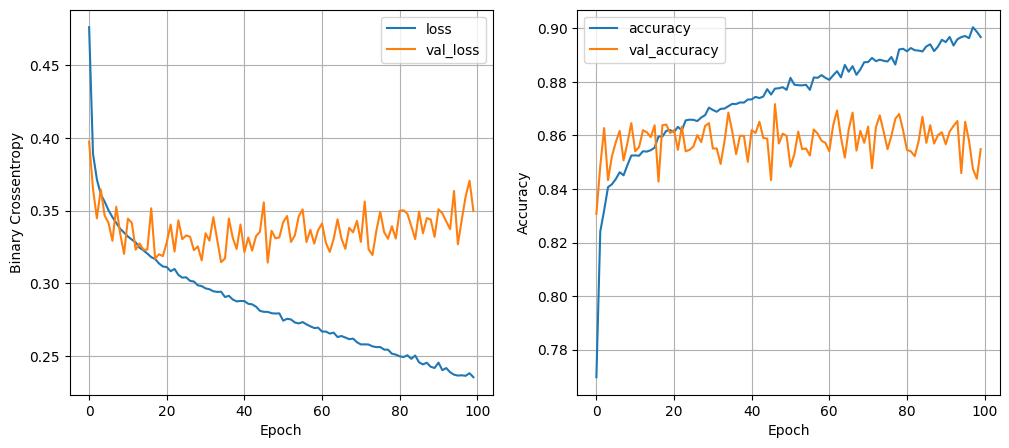

In [50]:
plot_history(history)

In [51]:
pred_y = nn_model.predict(test_X)
pred_y = (pred_y>0.5).astype(int).reshape(-1,)
pred_y

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([1, 1, 0, ..., 1, 1, 0])

In [52]:
print(classification_report(pred_y,test_y))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1385
           1       0.88      0.90      0.89      2419

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

